In [177]:
# antes de empezar importamos las librerías que necesitaremos para poder trabajar con todos sus métodos. También configuramos la opción de ver todas las columnas
import numpy as np
import pandas as pd
import re

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

from scipy.stats import shapiro, kstest, poisson, chisquare, expon
from itertools import combinations



pd.set_option('display.max_columns', None)


In [178]:
df_abc = pd.read_csv("df_abc")
print(df_abc.head())


   employee_id attrition business_travel  daily_rate  distance_from_home  \
0            1        No      non-travel       684.0                   6   
1            2        No      non-travel       699.0                   1   
2            3        No   travel_rarely       532.0                   4   
3            4        No   travel_rarely       359.0                   2   
4            5        No      non-travel      1319.0                   3   

   education   education_field  environment_satisfaction  gender hourly_rate  \
0          3             Other                       1.0    male          51   
1          4     Life Sciences                       3.0    male          65   
2          2  Technical Degree                       3.0    male          58   
3          4           Medical                       1.0  female          82   
4          3  Technical Degree                       1.0  female          45   

   job_involvement  job_level           job_role  job_satisfac

In [179]:
df_abc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   employee_id                 1614 non-null   int64  
 1   attrition                   1614 non-null   object 
 2   business_travel             1614 non-null   object 
 3   daily_rate                  1614 non-null   float64
 4   distance_from_home          1614 non-null   int64  
 5   education                   1614 non-null   int64  
 6   education_field             1614 non-null   object 
 7   environment_satisfaction    1514 non-null   float64
 8   gender                      1614 non-null   object 
 9   hourly_rate                 1614 non-null   object 
 10  job_involvement             1614 non-null   int64  
 11  job_level                   1614 non-null   int64  
 12  job_role                    1614 non-null   object 
 13  job_satisfaction            1614 

In [180]:
df_abc.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,1614.0,807.500000,466.065982,1.0,404.250000,807.500000,1210.750000,1614.0
daily_rate,1614.0,740.462825,442.453316,0.0,371.500000,722.500000,1130.750000,1499.0
distance_from_home,1614.0,11.141884,10.450560,1.0,2.000000,8.000000,17.000000,49.0
education,1614.0,2.925031,1.022357,1.0,2.000000,3.000000,4.000000,5.0
environment_satisfaction,1514.0,2.714003,1.098326,1.0,2.000000,3.000000,4.000000,4.0
job_involvement,1614.0,2.739777,0.711567,1.0,2.000000,3.000000,3.000000,4.0
job_level,1614.0,2.068154,1.101344,1.0,1.000000,2.000000,3.000000,5.0
job_satisfaction,1614.0,2.738538,1.106163,1.0,2.000000,3.000000,4.000000,4.0
monthly_income,1614.0,56322.385378,33908.786047,10090.0,48590.000000,48590.000000,48590.000000,199990.0
monthly_rate,1614.0,14284.495663,7110.414585,2094.0,8001.000000,14248.500000,20364.000000,26999.0


In [181]:
#Grupo 1: GRUPO A df_a: Empleados del grupo que tienen un nivel de satisfacción igual o mayor a 3 
#Grupo 2: GRUPO B df_b: Empleados del grupo que tienen un nivel de satisfacción menor a 3 

In [182]:
mask = df_abc['general_satisfaction'] >= 3

In [183]:
## Creamos una máscara con la gente que tiene un nivel de satisfacción mayor o igual a 3
df_a = df_abc.loc[mask]
df_a.shape


(106, 33)

In [184]:
## Creamos una máscara con la gente que tiene un nivel de satisfacción menor a 3
df_b = df_abc.loc[~mask]
df_b.shape

(1508, 33)

In [185]:
print(f"apenas el {round(df_a.shape[0]/df_abc.shape[0]*100,2)}% de las personas empleadas en esta empresa tienen un nivel de satisfacción mayor a 3")

apenas el 6.57% de las personas empleadas en esta empresa tienen un nivel de satisfacción mayor a 3


Text(0.5, 1.0, 'Personas empleadas con un nivel de satisfacción mayor a 3')

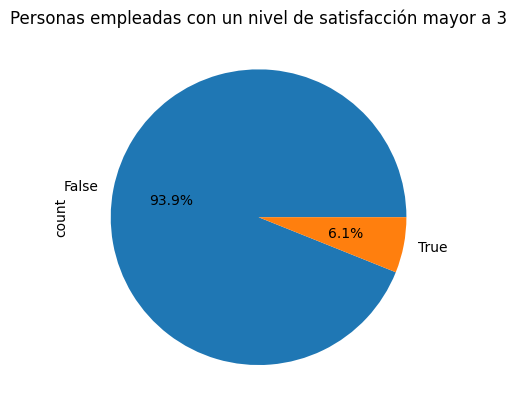

In [186]:
(df_abc['general_satisfaction']>3).value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Personas empleadas con un nivel de satisfacción mayor a 3')




In [187]:
df_abc['satisfaction_group'] = pd.cut(df_abc['general_satisfaction'], bins=5, labels=[1, 2, 3, 4, 5])

# Ver los primeros datos para verificar el agrupamiento
print(df_abc[['general_satisfaction', 'satisfaction_group']].head())

   general_satisfaction satisfaction_group
0              2.222222                  3
1              2.916667                  3
2              2.694444                  3
3              1.722222                  2
4              1.250000                  2


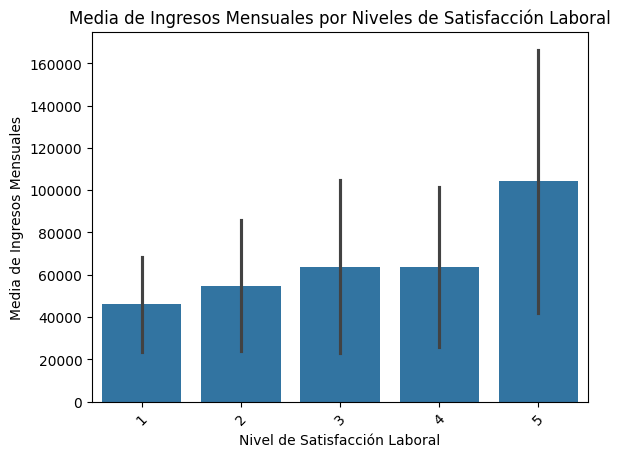

In [188]:
sns.barplot(data=df_abc, x='satisfaction_group', y='monthly_income', errorbar='sd')
plt.title('Media de Ingresos Mensuales por Niveles de Satisfacción Laboral')
plt.xlabel('Nivel de Satisfacción Laboral')
plt.ylabel('Media de Ingresos Mensuales')
plt.xticks(rotation=45) 
plt.show()

In [189]:

## Podemos ver que hay una relación entre el ingreso mensual de las personas empleadas y el nivel de satisfacción. Podemos decir 
# que las personas con un nivel de satisfacción de 4 o 5, tienen en promedio un sueldo más alto. 

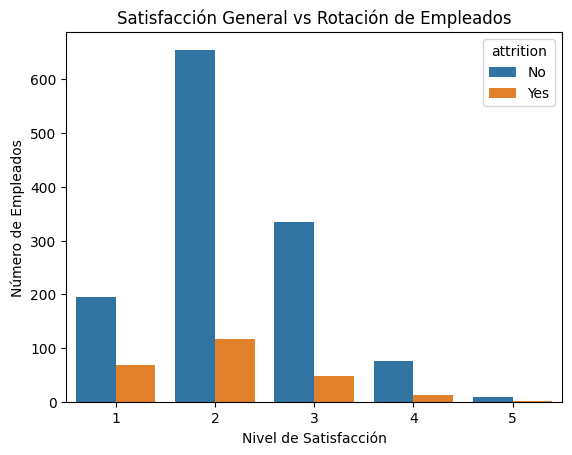

In [190]:
# Buscamos que este gráfico de barras nos permita ver la distribución de la rotación (attrition)en diferentes niveles de satisfacción
# ¿identificamos si las personas empleadas con menor satisfacción tienen mayor rotación?
# Crear un gráfico de barras apiladas
sns.countplot(data=df_abc, x="satisfaction_group", hue='attrition')
plt.title('Satisfacción General vs Rotación de Empleados')
plt.xlabel('Nivel de Satisfacción')
plt.ylabel('Número de Empleados')
plt.show()

In [191]:
## En esta gráfica podemos observar que las personas que han abandonado la empresa tenían 
# un nivel de satisfacción bastante menor que el de las personas que no

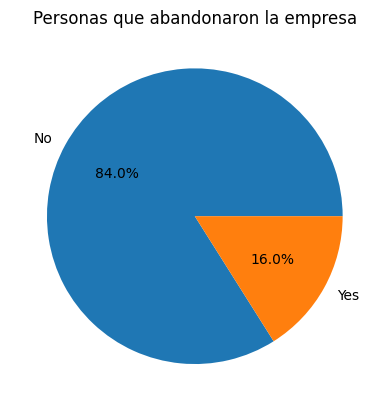

3

In [192]:
#Gráfico circular para ver la distribución de rotación
#Podemos ver de manera visual la proporcion de personas empleadas que han dejado la empresa frente a los que permanecen
#¿podemos ver de forma clara la distribución de rotación ?

df_abc['attrition'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Personas que abandonaron la empresa')
plt.ylabel('')
plt.show()
3

In [193]:
## Podemos ver que el 16% de las personas han abandonado la empresa

In [194]:
attrition_mask = df_abc["attrition"] == "Yes"
df_stayers = df_abc[attrition_mask]

df_stayers.sample(2)

,employee_id,attrition,business_travel,daily_rate,distance_from_home,education,education_field,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,relationship_satisfaction,stock_option_level,total_working_years,training_time_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,date_birth,role_department,remote_work,department,general_satisfaction,satisfaction_group
616,617,Yes,non-travel,1097.0,10,4,Other,3.0,male,96,3,1,Research Scientist,3,Single,29360.0,10826,1,Yes,11,3,0,6.0,4,3,6,0,2,1979,Unknown,False,unknown,1.444444,2
1239,1240,Yes,non-travel,626.0,1,2,Other,1.0,male,98,2,3,Laboratory Technician,3,Unknown,48590.0,19294,9,unknown,13,4,0,0.0,2,3,1,0,0,1975,Unknown,False,unknown,0.444444,1


In [195]:

df_leavers = df_abc.loc[~attrition_mask]

df_leavers.sample(2)

,employee_id,attrition,business_travel,daily_rate,distance_from_home,education,education_field,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,relationship_satisfaction,stock_option_level,total_working_years,training_time_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,date_birth,role_department,remote_work,department,general_satisfaction,satisfaction_group
170,171,No,non-travel,0.0,23,2,Other,4.0,male,37,2,2,Research Scientist,3,Single,48590.0,14811,1,unknown,12,4,0,20.0,2,3,20,3,7,1981,Research Scientist - Research & Development,True,Research & Development,3.083333,4
645,646,No,travel_rarely,1470.0,10,3,Other,2.0,female,71,3,1,Research Scientist,2,Married,39360.0,9953,1,unknown,11,1,1,8.0,2,1,8,7,7,1986,Research Scientist - Research & Development,False,Research & Development,1.388889,2


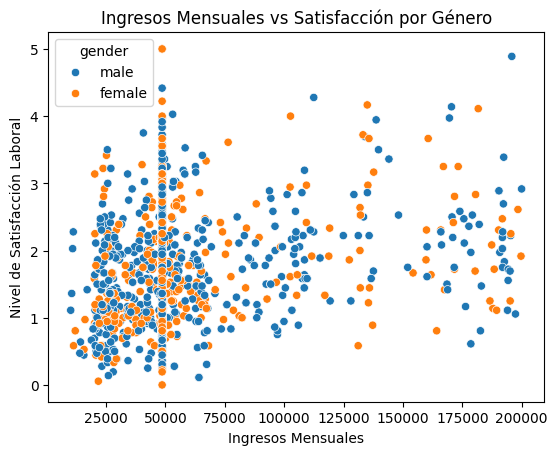

In [196]:
#Gráfico de dispersión
# Intentamos que nos muestre la relación entre los ingresos mensuales y el nivel de satisfacción dividido por género
#¿podemos ver la relación entre ingresos y satisfacción y cómo se distribuye según género?

sns.scatterplot(data=df_abc, x='monthly_income', y='general_satisfaction', hue='gender')
plt.title('Ingresos Mensuales vs Satisfacción por Género')
plt.xlabel('Ingresos Mensuales')
plt.ylabel('Nivel de Satisfacción Laboral')
plt.show()


C:\Users\trico\AppData\Local\Temp\ipykernel_23572\3219589473.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Estado Civil')


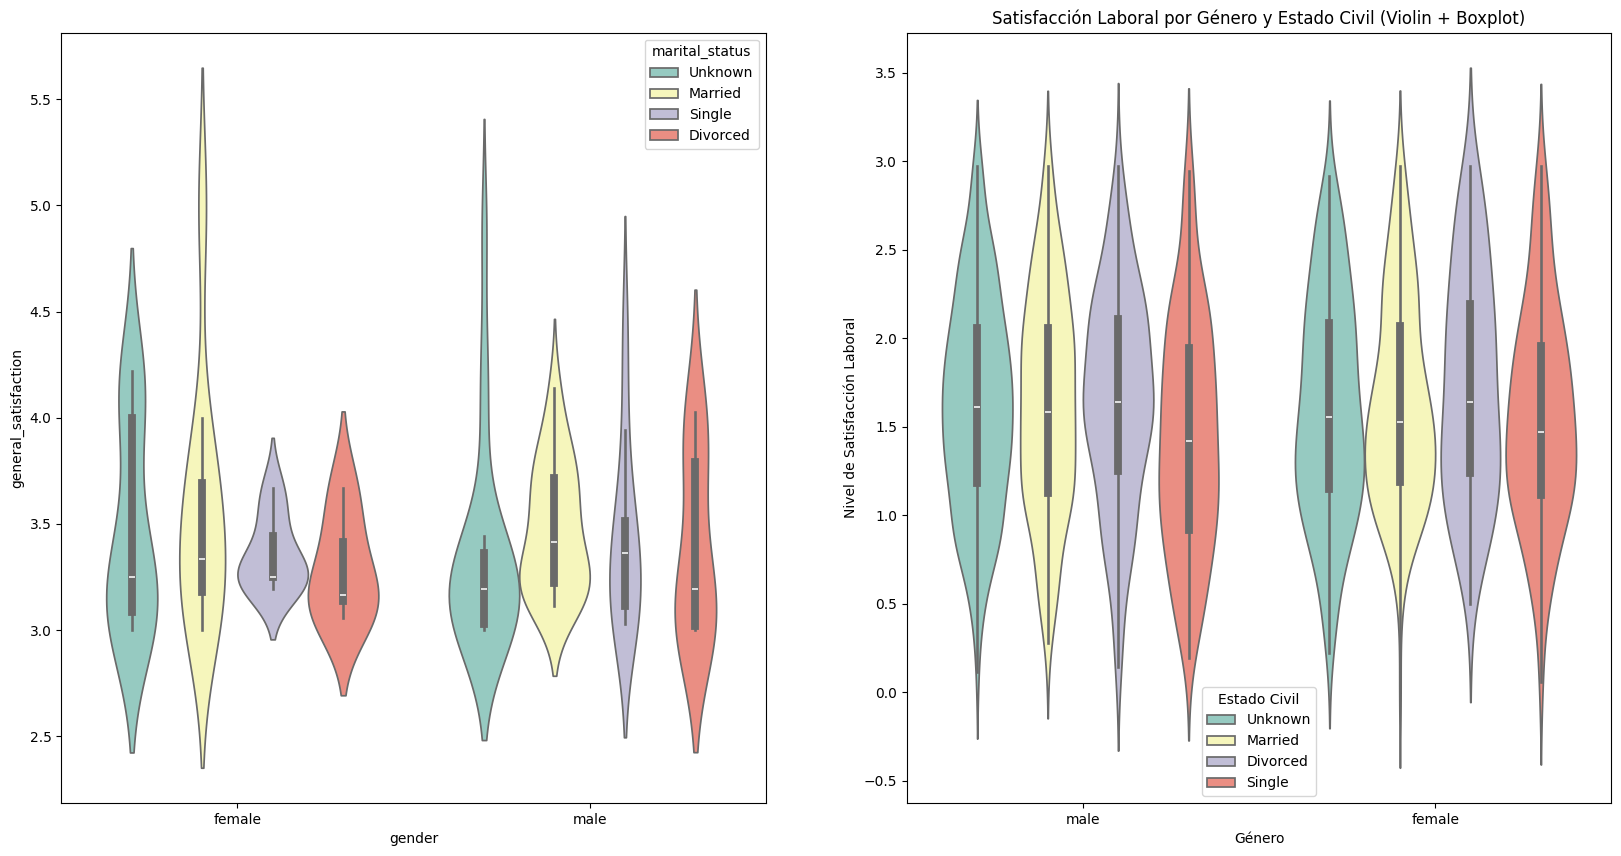

In [197]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10))
sns.violinplot(data=df_a, x='gender', y='general_satisfaction', hue='marital_status', inner='box', palette='Set3', ax = axes[0])
plt.title('Satisfacción Laboral por Género y Estado Civil (Violin + Boxplot)')
plt.xlabel('Género')
plt.ylabel('Nivel de Satisfacción Laboral')
plt.legend(title='Estado Civil')


sns.violinplot(data=df_b, x='gender', y='general_satisfaction', hue='marital_status', inner='box', palette='Set3', ax = axes[1])
plt.title('Satisfacción Laboral por Género y Estado Civil (Violin + Boxplot)')
plt.xlabel('Género')
plt.ylabel('Nivel de Satisfacción Laboral')
plt.legend(title='Estado Civil')


In [198]:
# ROTACIÓN POR NIVEL DE INGRESOS
# se dividen las personas empleadas en cuartiles o percentiles según ingresos para ver las tasas de rotación
#varian con diferentes niveles de ingresos

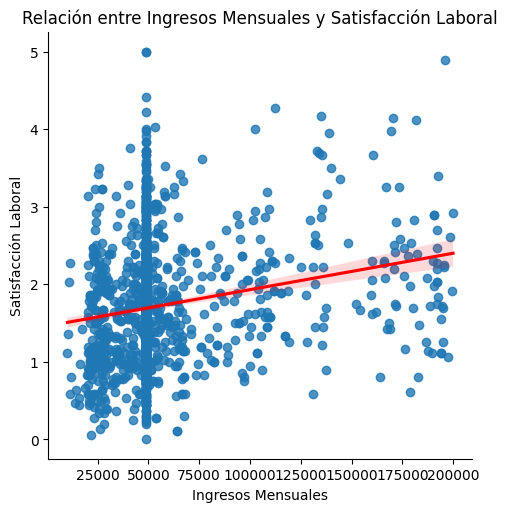

In [199]:
# Scatter plot con línea de tendencia
sns.lmplot(x='monthly_income', y='general_satisfaction', data=df_abc, line_kws={'color': 'red'})
plt.title('Relación entre Ingresos Mensuales y Satisfacción Laboral')
plt.xlabel('Ingresos Mensuales')
plt.ylabel('Satisfacción Laboral')
plt.show()

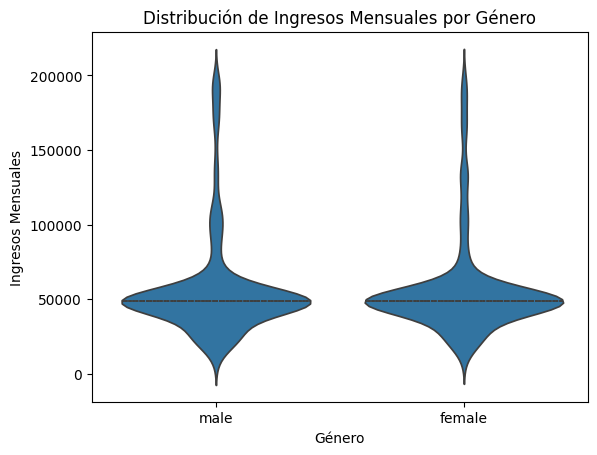

In [200]:
sns.violinplot(data=df_abc, x='gender', y='monthly_income', inner="quart")
plt.title('Distribución de Ingresos Mensuales por Género')
plt.xlabel('Género')
plt.ylabel('Ingresos Mensuales')
plt.show()

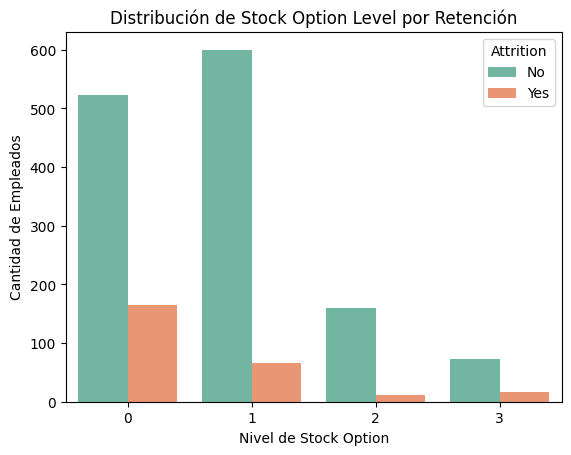

In [201]:
# podemos ver como se distribuye  el nivel de opciones sobre las acciones en las personas empleadas que se quedan y las que se van
# Crear gráfico de barras para stock_option_level y attrition
sns.countplot(data=df_abc, x='stock_option_level', hue='attrition', palette='Set2')
plt.title('Distribución de Stock Option Level por Retención')
plt.xlabel('Nivel de Stock Option')
plt.ylabel('Cantidad de Empleados')
plt.legend(title='Attrition')
plt.show()

C:\Users\trico\AppData\Local\Temp\ipykernel_23572\698200888.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_abc, x='attrition', y='training_time_last_year', palette='Set3', inner='quartile')


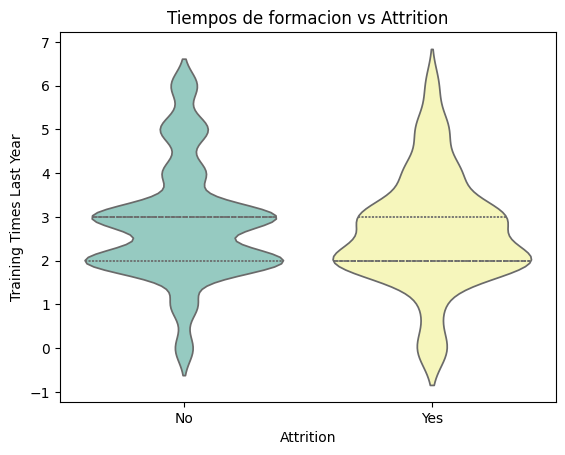

In [202]:
# podemos ver la distribución de la formación recibida el último año entre las personas que se van y se quedan 
# podemos ver si las personas que se quedan o se van han recibido mas o menos formación en el último año
# Gráfico de violín para training_times_last_year y attrition
sns.violinplot(data=df_abc, x='attrition', y='training_time_last_year', palette='Set3', inner='quartile')
plt.title('Tiempos de formacion vs Attrition')
plt.xlabel('Attrition')
plt.ylabel('Training Times Last Year')
plt.show()

([<matplotlib.axis.XTick at 0x25534127d50>,
 [Text(0, 0, 'Se Quedaron'), Text(1, 0, 'Se Fueron')])

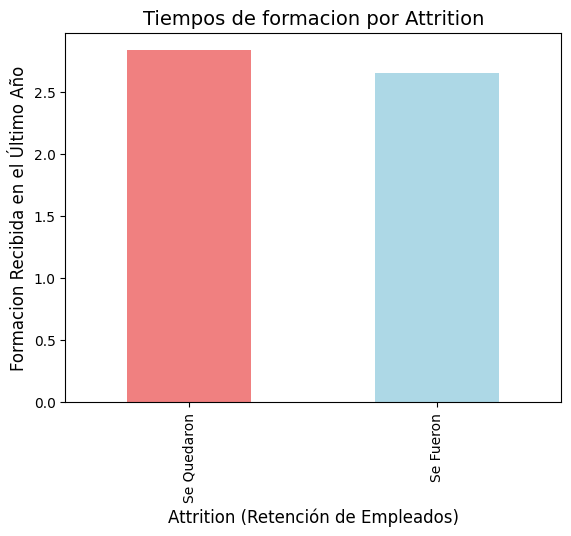

In [203]:
# Promedio de formación recibida vs Rotación

contar = df_abc.groupby('attrition')['training_time_last_year'].mean()

# Crear gráfico de barras 1
contar.plot(kind='bar', color=['lightcoral', 'lightblue'])

# Añadir títulos y etiquetas
plt.title('Tiempos de formacion por Attrition', fontsize=14)
plt.xlabel('Attrition (Retención de Empleados)', fontsize=12)
plt.ylabel('Formacion Recibida en el Último Año', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Se Quedaron', 'Se Fueron'])



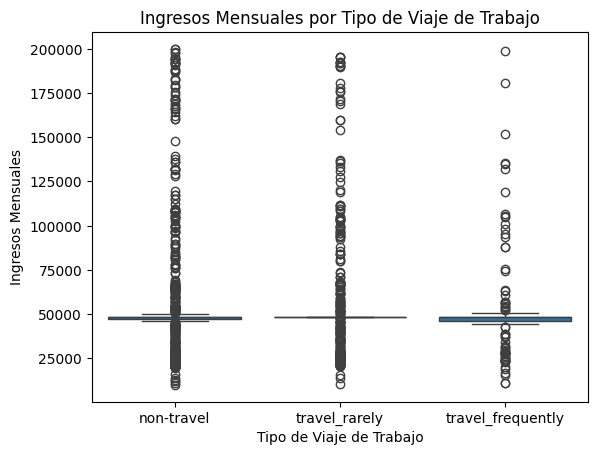

In [204]:
#Dispersión entre business_travel e ingresos mensuales 
#¿podemos ver la relación entre el tipo de viajes de trabajo y los ingresos?

sns.boxplot(data=df_b, x='business_travel', y='monthly_income')
plt.title('Ingresos Mensuales por Tipo de Viaje de Trabajo')
plt.xlabel('Tipo de Viaje de Trabajo')
plt.ylabel('Ingresos Mensuales')
plt.show()


In [205]:
# COMPARAR EL NIVEL DE ROTACION EN FUNCION DEL GÉNERO E INGRESOS MENSUALES 
# Tratamos de observar si hay direncias significativas en la tasa de rotación según el género e ingresos 


In [206]:
# Agrupar por género y calcular la tasa de rotación

rotation_by_gender = df_abc.groupby('gender')['attrition'].value_counts(normalize=True).unstack()
rotation_by_gender.columns = ['No Attrition', 'Attrition']
rotation_by_gender['Attrition Rate'] = rotation_by_gender['Attrition'] * 100

print(rotation_by_gender)


        No Attrition  Attrition  Attrition Rate
gender                                         
female      0.850700   0.149300       14.930016
male        0.832132   0.167868       16.786818


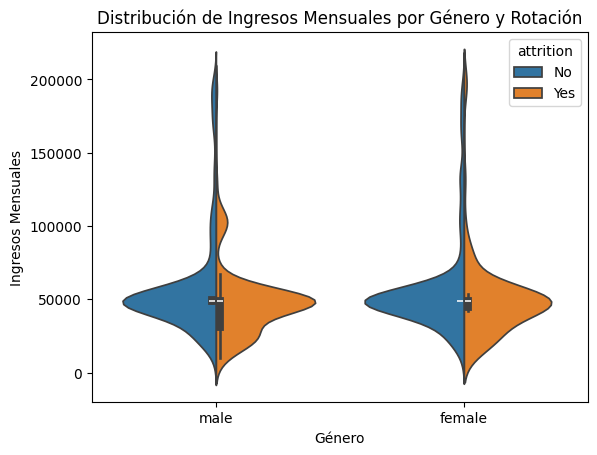

In [211]:
# Violin plot de ingresos mensuales por género y rotación
# ¿ esto es más útil para ver la distribucción completa de los ingresos mensuales por género y rotación?
sns.violinplot(data=df_abc, x='gender', y='monthly_income', hue='attrition', split=True)
plt.title('Distribución de Ingresos Mensuales por Género y Rotación')
plt.xlabel('Género')
plt.ylabel('Ingresos Mensuales')
plt.show()


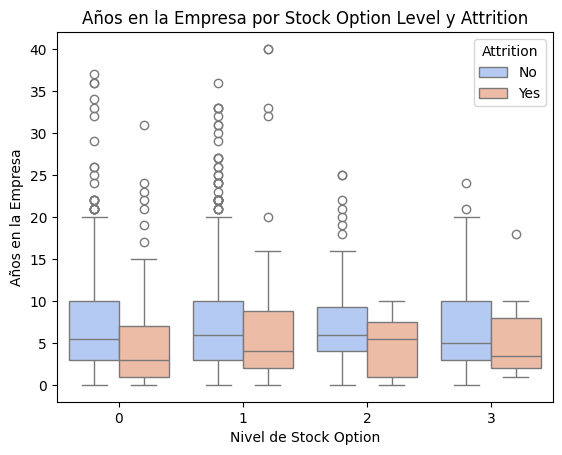

In [208]:
#Nos permite comparar si los años en la empresa influyen según el nivle de acciona y si hay tendencia entre los que se van
# Gráfico de caja para years_at_company vs stock_option_level y attrition
sns.boxplot(data=df_abc, x='stock_option_level', y='years_at_company', hue='attrition', palette='coolwarm')
plt.title('Años en la Empresa por Stock Option Level y Attrition')
plt.xlabel('Nivel de Stock Option')
plt.ylabel('Años en la Empresa')
plt.legend(title='Attrition')
plt.show()

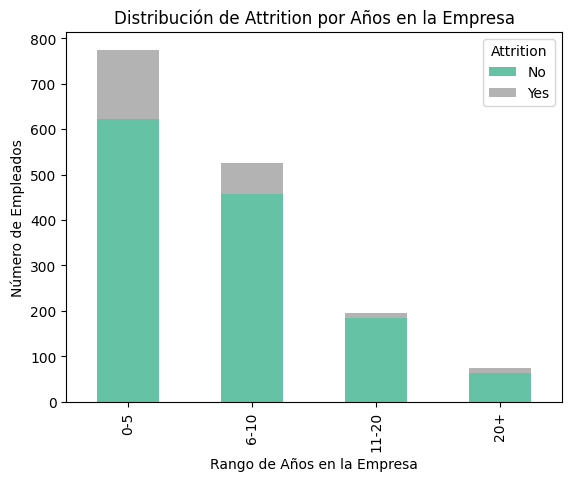

In [209]:
# Relación entre antiguedad en la empresa y número de personas que abandonan la empresa

# Crear una nueva columna categórica para agrupar los valores de training_times_last_year y years_at_company en rangos
df_abc['years_at_company_bins'] = pd.cut(df_abc['years_at_company'], bins=[0, 5, 10, 20, 40], labels=['0-5', '6-10', '11-20', '20+'])
df_abc['training_times_bins'] = pd.cut(df_abc['training_time_last_year'], bins=[0, 2, 5, 10], labels=['0-2', '3-5', '6+'])

# Gráfico de barras apiladas
stacked_bar = pd.crosstab(df_abc['years_at_company_bins'], df_abc['attrition'])
stacked_bar.plot(kind='bar', stacked=True, colormap='Set2')

# Añadir etiquetas y título
plt.title('Distribución de Attrition por Años en la Empresa')
plt.xlabel('Rango de Años en la Empresa')
plt.ylabel('Número de Empleados')
plt.legend(title='Attrition')
plt.show()


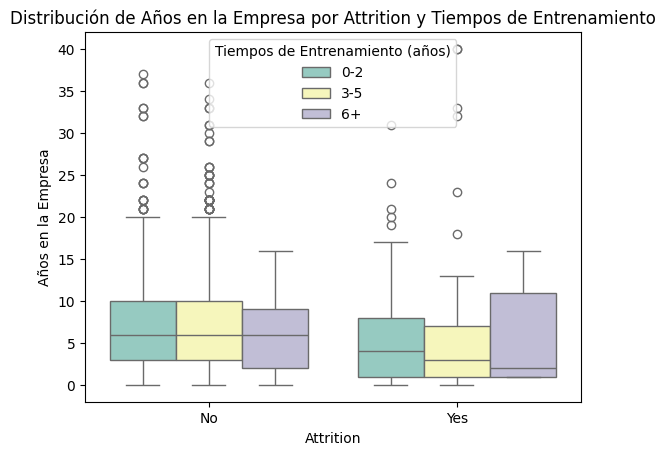

In [210]:
# Gráfico de cajas para comparar años en la empresa y tiempo de entrenamiento con attrition
sns.boxplot(data=df_abc, x='attrition', y='years_at_company', hue='training_times_bins', palette='Set3')
plt.title('Distribución de Años en la Empresa por Attrition y Tiempos de Entrenamiento')
plt.xlabel('Attrition')
plt.ylabel('Años en la Empresa')
plt.legend(title='Tiempos de Entrenamiento (años)')
plt.show()